<a href="https://colab.research.google.com/github/ArunVignesh75/ArunVignesh75/blob/main/cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Breast Cancer Prediction Using XGBoost and SVM Model



#Dataset Information:

The dataset consists of several predictor variables and one target variable, Diagnosis.
The target variable has values 'Benign' and 'Malignant', where 'Benign' means that the
cells are not harmful or there is no cancer and 'Malignant' means that the patient has
cancer and the cells have a harmful effect 

#Table of contents

1.Import Packages
2.Read Data
3.Understand and Prepare the Data
   * 3.1- Data types
   * 3.2- Data Visualization
   * 3.3- Missing Data Treatment
   * 3.4- Label Encoding of Target Variable
   * 3.5- Feature Selection
4.Ensemble Learning Techniques
   * XGBoost 
   * XGBClassifier
5.SVM Model
6.Model Comparison

In [ ]:
#importing important packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
from sklearn.metrics import accuracy_score, plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
#reading the dataset
df=pd.read_csv("cancer.csv")
df


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Checking for Null-Values in dataset.

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
del df['Unnamed: 32']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Text(0.5, 1.0, 'Count Plot of Diagnosis')

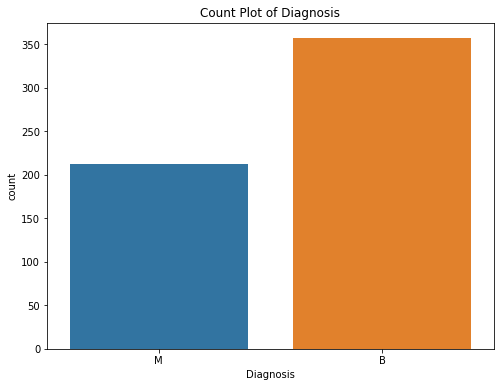

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(df['diagnosis'])
plt.xlabel("Diagnosis")
plt.title("Count Plot of Diagnosis")

#Data_Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18d0c18f10>,
      dtype=object)

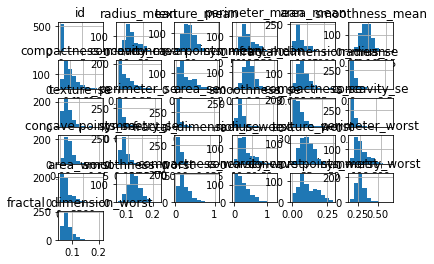

In [ ]:
df.hist()

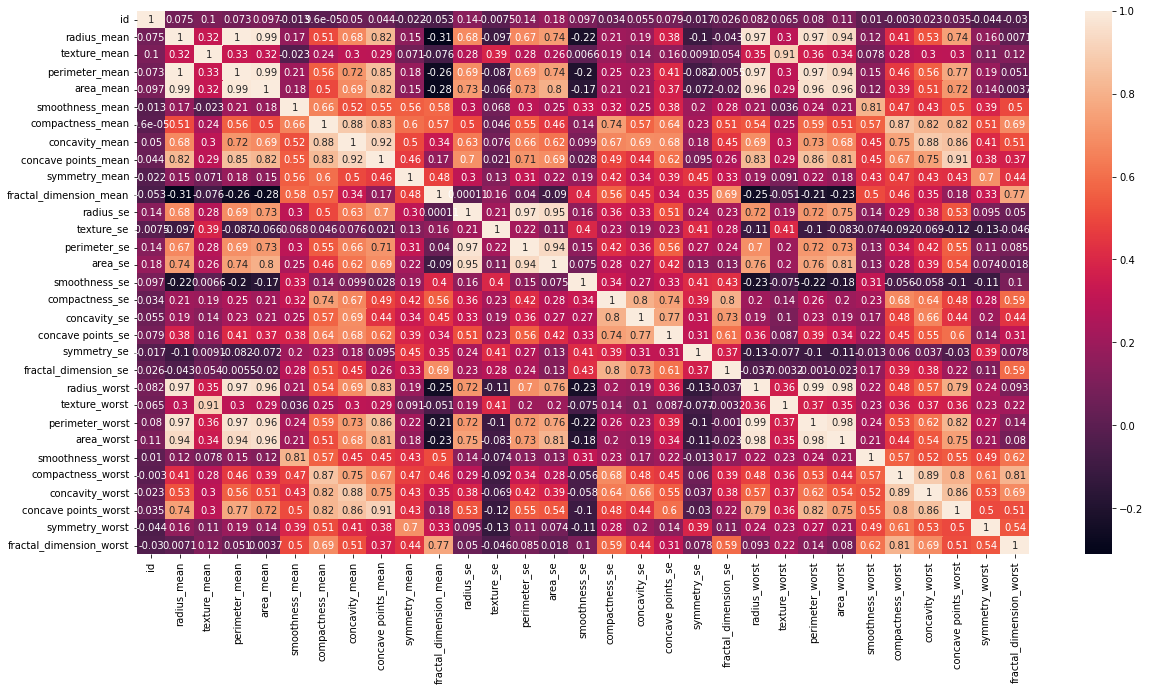

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.ioff()

From the heat map, we can see that many features in the dataset are highly correlated.

some of the highly co-related features are:-
 radius mean,perimeter mean,area mean,concave points mean,perimeter se,area se,perimeter worst,area worst,concave points worst,concavity worst

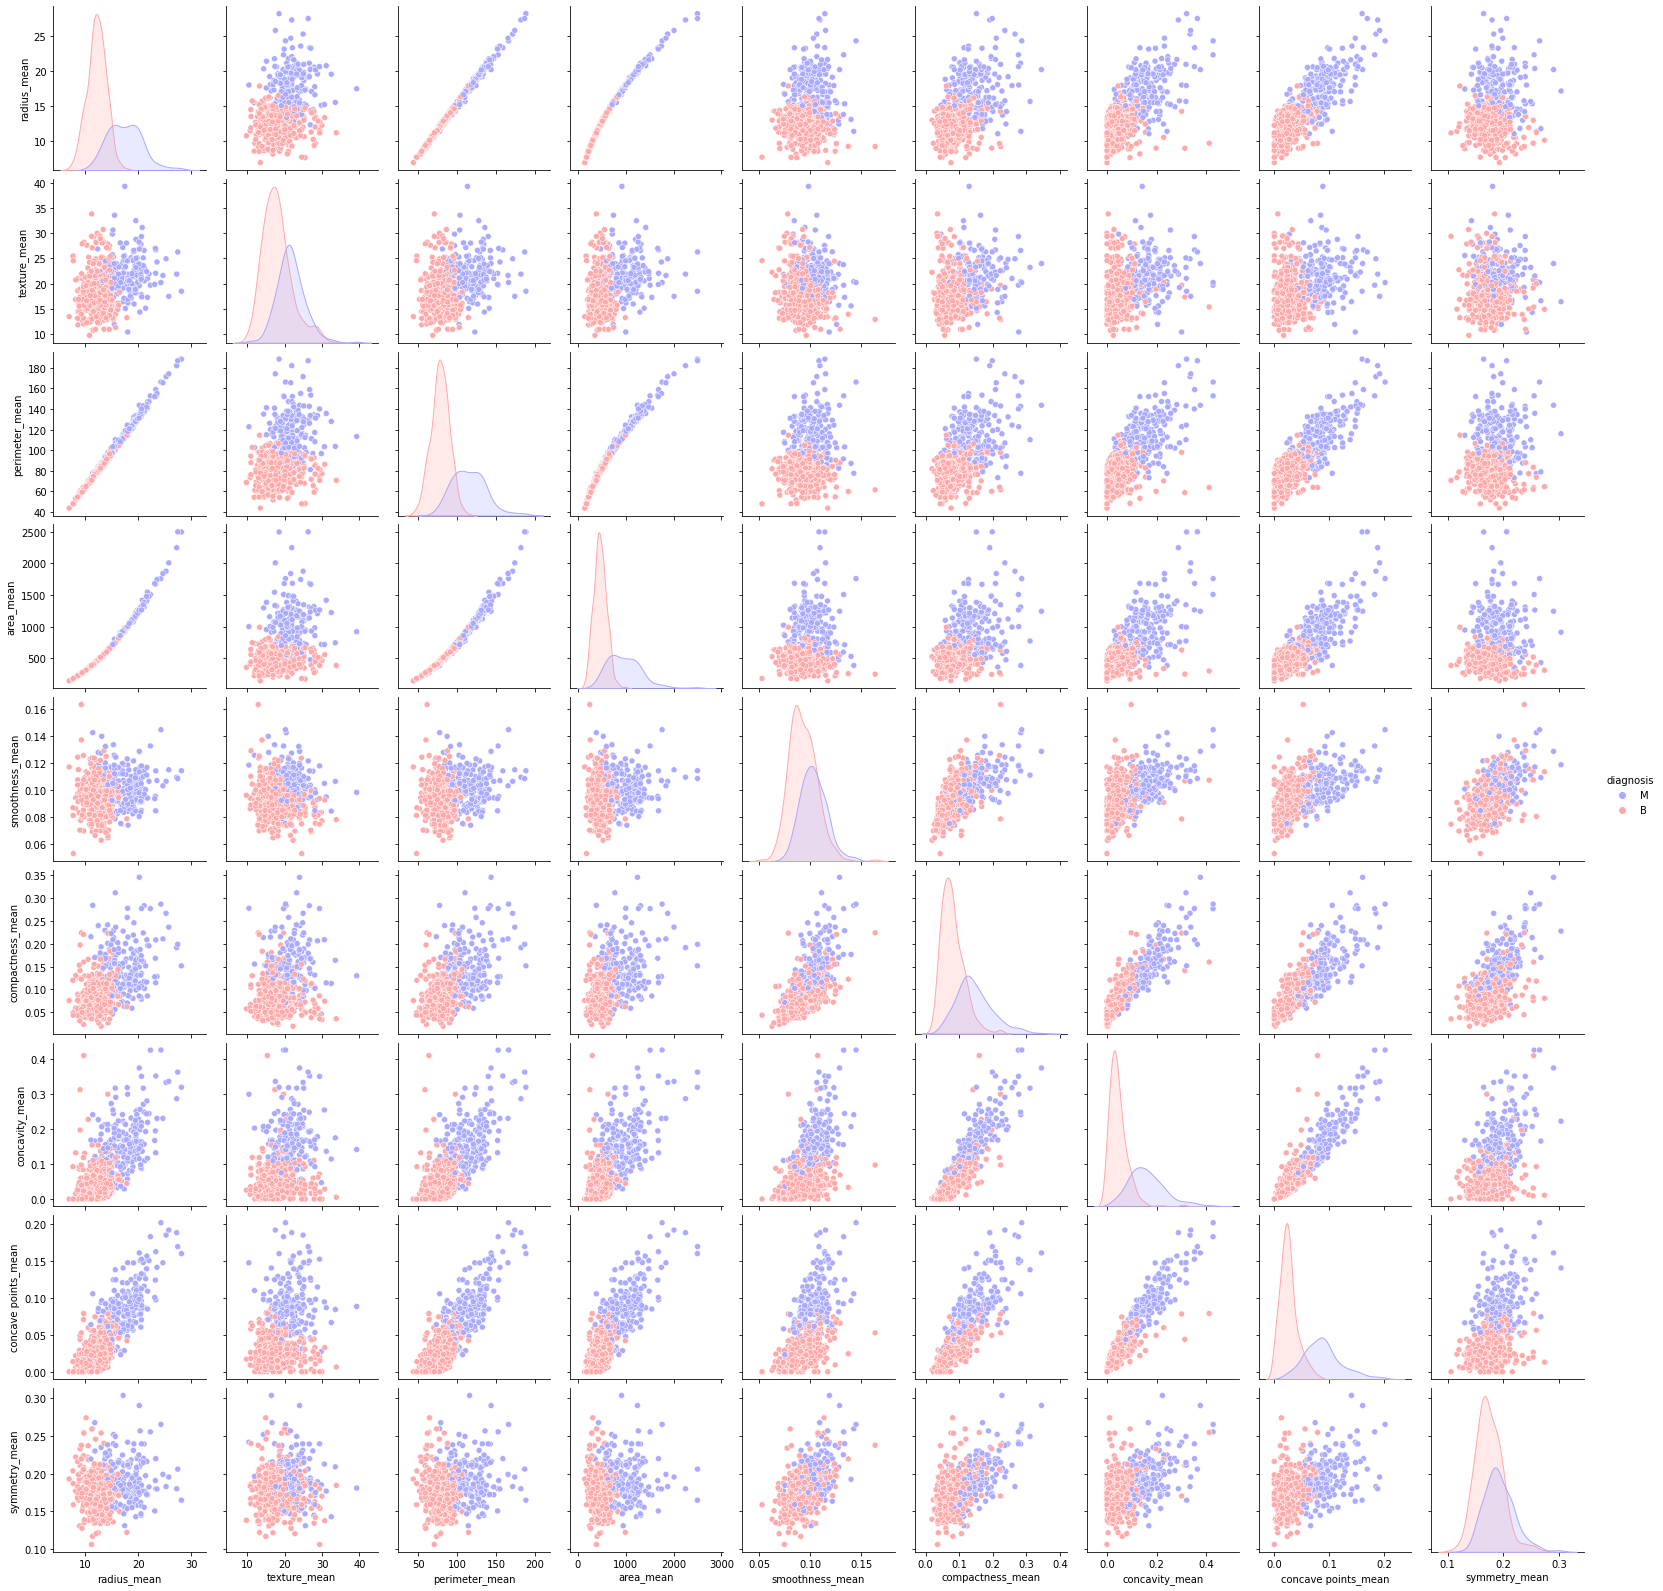

In [ ]:
from pylab import rcParams

rcParams['figure.figsize'] = 8,5

cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean','diagnosis']

sns_plot = sns.pairplot(data=df[cols],hue='diagnosis', palette='bwr')

In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

Label Encoding Target Variable.

In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
df["diagnosis"] = df["diagnosis"].map({"B" : 0, "M" : 1})

In [ ]:

original_features = df[['radius_mean','perimeter_mean','area_mean','concave points_mean','perimeter_se','area_se','perimeter_worst','area_worst','concave points_worst','concavity_worst']]
original_features
# radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,concave points_worst,concavity_worst

,radius_mean,perimeter_mean,area_mean,concave points_mean,perimeter_se,area_se,perimeter_worst,area_worst,concave points_worst,concavity_worst
0,17.99,122.80,1001.0,0.14710,8.589,153.40,184.60,2019.0,0.2654,0.7119
1,20.57,132.90,1326.0,0.07017,3.398,74.08,158.80,1956.0,0.1860,0.2416
2,19.69,130.00,1203.0,0.12790,4.585,94.03,152.50,1709.0,0.2430,0.4504
3,11.42,77.58,386.1,0.10520,3.445,27.23,98.87,567.7,0.2575,0.6869
4,20.29,135.10,1297.0,0.10430,5.438,94.44,152.20,1575.0,0.1625,0.4000
...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.13890,7.673,158.70,166.10,2027.0,0.2216,0.4107
565,20.13,131.20,1261.0,0.09791,5.203,99.04,155.00,1731.0,0.1628,0.3215
566,16.60,108.30,858.1,0.05302,3.425,48.55,126.70,1124.0,0.1418,0.3403
567,20.60,140.10,1265.0,0.15200,5.772,86.22,184.60,1821.0,0.2650,0.9387


In [ ]:
original_labels = np.array(df['diagnosis']) # target varaibles

In [ ]:
original_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
original_feature_list = list(original_features.columns) #orginal feature labels

#Spliting the Data

In [ ]:
original_train_features, original_test_features, original_train_labels, original_test_labels = train_test_split(original_features, original_labels, test_size = 0.25, random_state = 42)


In [ ]:
x_train = original_train_features
y_train = original_train_labels
x_test = original_test_features
y_test = original_test_labels
x_train

,radius_mean,perimeter_mean,area_mean,concave points_mean,perimeter_se,area_se,perimeter_worst,area_worst,concave points_worst,concavity_worst
287,12.890,81.89,515.9,0.01171,1.1150,12.68,87.40,577.0,0.05366,0.11860
512,13.400,88.64,556.7,0.08172,3.0930,33.67,113.30,844.4,0.20510,0.51060
402,12.960,84.18,525.2,0.01883,2.3970,20.21,96.31,621.9,0.06608,0.16040
446,17.750,117.30,981.6,0.08293,2.8730,43.95,145.40,1437.0,0.19700,0.63990
210,20.580,134.70,1290.0,0.09561,7.0290,111.70,158.30,1656.0,0.19200,0.38610
...,...,...,...,...,...,...,...,...,...,...
71,8.888,58.79,244.0,0.02872,3.1680,25.44,62.56,284.4,0.04786,0.14340
106,11.640,75.17,412.5,0.03485,2.1550,20.62,85.51,521.7,0.12180,0.28730
270,14.290,90.30,632.6,0.00625,0.8439,10.77,94.44,684.6,0.03333,0.03866
435,13.980,91.12,599.5,0.06463,1.6020,18.85,113.90,869.3,0.18270,0.40690


#Initialising the XGBoost Classifier Model.

In [ ]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train,y_train) #train the model
  model.score(x_test, y_test)
  print("Learning rate : ", lr, " Train score : ", model.score(x_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.9671361502347418  Cross-Val score :  0.9272425249169436
Learning rate :  0.02  Train score :  0.971830985915493  Cross-Val score :  0.9342746400885936
Learning rate :  0.03  Train score :  0.9835680751173709  Cross-Val score :  0.936655592469546
Learning rate :  0.04  Train score :  0.9835680751173709  Cross-Val score :  0.9389811738648948
Learning rate :  0.05  Train score :  0.9882629107981221  Cross-Val score :  0.9389811738648948
Learning rate :  0.06  Train score :  0.9929577464788732  Cross-Val score :  0.943687707641196
Learning rate :  0.07  Train score :  0.9929577464788732  Cross-Val score :  0.9436323366555925
Learning rate :  0.08  Train score :  0.9953051643192489  Cross-Val score :  0.9483388704318937
Learning rate :  0.09  Train score :  0.9953051643192489  Cross-Val score :  0.9483388704318937
Learning rate :  0.1  Train score :  0.9953051643192489  Cross-Val score :  0.9529900332225913
Learning rate :  0.11  Train score :  0.9976

In [ ]:
model = xgb.XGBClassifier(learning_rate = 0.08, n_estimators=100)
model.fit(x_train,y_train) #train the model
model.score(x_test, y_test) # scoring the model

0.9440559440559441

#Predicting and Evaluating the Model

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0])

In [ ]:
xgb_score = roc_auc_score(y_test,y_pred)
xgb_score

0.9441323345817727

In [ ]:
accuracy_score(y_test,y_pred)

0.9440559440559441

In [ ]:
z = [[17.99,122.8,1001,0.1471,8.589,153.4,184.6,2019,0.2654,0.7119]]
test2= pd.DataFrame(z,columns=
['radius_mean','perimeter_mean','area_mean','concave points_mean','perimeter_se','area_se','perimeter_worst','area_worst','concave points_worst','concavity_worst'],dtype=float) 
p=model.predict(test2)
print("Diagnosis [0 - No Yes - 1] :\n Result : ",p[0])

Diagnosis [0 - No Yes - 1] :
 Result :  1


In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        89
           1       0.91      0.94      0.93        54

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



XGBoost Model is having a Auroc Score of 0.94

#SVM MODEL PREDICTION

In [ ]:
dff = df
dff

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
X = dff.loc[:,dff.columns[2:]]
y = dff['diagnosis']
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Using PCA for Feature Selection. from narrowing 30 features to 2 features.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

Text(0.5, 1.0, 'PCA')

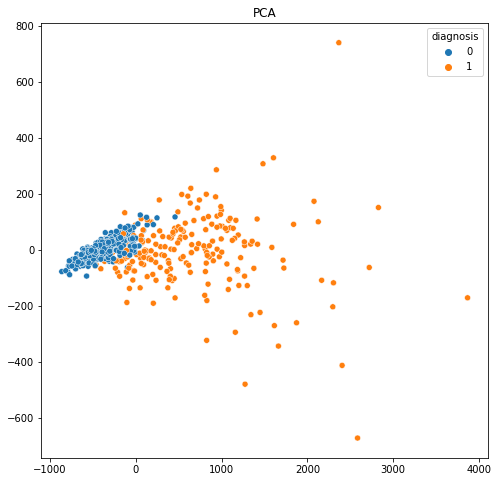

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=dff['diagnosis'])
plt.title("PCA")


Spliting the Data

In [ ]:
X_train1, X_test1, y_train2, y_test2 = train_test_split(X_pca, y, test_size=0.2)
X_train1

array([[-1.05468675e+02,  4.65610098e+01],
       [ 3.88504338e+02,  4.55473651e+01],
       [ 8.21589728e+02,  1.98676102e+02],
       [ 6.41497926e+02,  2.19956200e+02],
       [-4.07535831e+02, -3.31164214e+01],
       [ 4.04385934e+02, -6.70795449e+01],
       [-3.49091838e+02,  3.53879589e+00],
       [-7.44091835e+02, -5.43008275e+01],
       [ 8.32609773e+02, -1.96837890e+01],
       [ 7.90621392e+02,  1.11272011e+02],
       [-4.47998868e+02,  4.47918121e+00],
       [-6.11750001e+02, -4.38521265e+01],
       [-3.19372507e+02, -2.76852621e+01],
       [-1.17871335e+02,  5.89600115e+01],
       [-3.27023019e+02,  3.25045174e+01],
       [-5.62095002e+02,  9.80852549e+00],
       [-6.00574132e+02, -1.23314728e+01],
       [-6.04822971e+02, -1.94074215e+00],
       [ 1.19401173e+03,  5.31752125e+01],
       [-3.91209726e+01, -4.16049671e+01],
       [ 2.88844429e+02,  1.12396008e+01],
       [ 4.10049756e+02,  2.86413190e+00],
       [-3.58981873e+02,  3.87104912e+01],
       [-2.

In [ ]:
X_train1.shape

(455, 2)

In [ ]:
#Scaling the Data

In [ ]:
sc = StandardScaler()

X_train2 = sc.fit_transform(X_train1)
X_test2= sc.transform(X_test1)

#Initialising the SVM Model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)

grid.fit(X_train, y_train)






























from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)

grid.fit(X_train, y_train)

In [ ]:
svc = SVC(probability=True)

svc.fit(X_train2,y_train2)

y_pred_svc = svc.predict(X_test2)

In [ ]:
y_pred_svc

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0])

#Confusion Matrix

In [ ]:
confusion_matrix(y_test2,y_pred_svc)

array([[71,  3],
       [ 3, 37]])

#Evaluating the model

In [ ]:
accuracy_score(y_test2,y_pred_svc)

0.9473684210526315

In [ ]:
svm_score = roc_auc_score(y_test2,y_pred_svc)
svm_score

0.9422297297297297

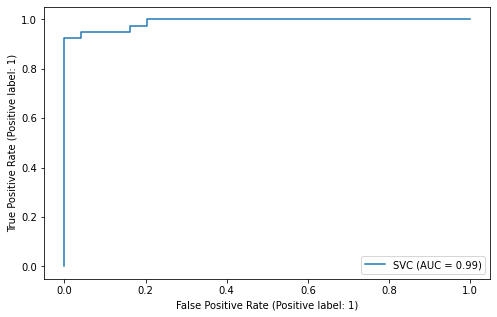

In [ ]:
plot_roc_curve(svc, X_test2, y_test2)

In [ ]:
svc.predict([[122.8,1001]])


array([1])

#Classification Report

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test2, y_pred_svc))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        74
           1       0.93      0.93      0.93        40

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
print("The score of XGBOOST Model is:",xgb_score)
print("The score of SVM Model is:",svm_score)

The score of XGBOOST Model is: 0.9441323345817727
The score of SVM Model is: 0.9422297297297297


At first, I imported nesscessary libraries, and loaded the dataset then I performed exploratory data analysis for  better understanding each of dataset associated with cancer.

Next, I selected 10 best features for my model and performed XGBClassifier classifier. The accuracy rate of this model is 94%.
And then, I used PCA to narrow down 30 features to two important variables and created visualization based on these two variables. 

With visualization we can clearly separate the data between Benign and Malignant.

Finally, With two important variables of PCA, I preformed Support Vector Machines model to predict cancer. The auroc value of this model is 94%.

Hereby I explored the dataset and visualize the data, then i trained two different models and evaluated the models.

Thank you.